In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
%matplotlib inline

In [95]:
#loading file
reviews = pd.read_csv('Recipe Reviews and User Feedback Dataset.csv')

In [97]:
reviews.head()

,Unnamed: 0,recipe_number,recipe_code,recipe_name,comment_id,user_id,user_name,user_reputation,created_at,reply_count,thumbs_up,thumbs_down,stars,best_score,text
0,0,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2G3aneMRgRMZwXqIHmSdXSG1hEM,u_9iFLIhMa8QaG,Jeri326,1,1665619889,0,0,0,5,527,"I tweaked it a little, removed onions because ..."
1,1,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2FsPC83HtzCsQAtOxlbL6RcaPbY,u_Lu6p25tmE77j,Mark467,50,1665277687,0,7,0,5,724,Bush used to have a white chili bean and it ma...
2,2,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2FPrSGyTv7PQkZq37j92r9mYGkP,u_s0LwgpZ8Jsqq,Barbara566,10,1664404557,0,3,0,5,710,I have a very complicated white chicken chili ...
3,3,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2DzdSIgV9qNiuBaLoZ7JQaartoC,u_fqrybAdYjgjG,jeansch123,1,1661787808,2,2,0,0,581,"In your introduction, you mentioned cream chee..."
4,4,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2DtZJuRQYeTFwXBoZRfRhBPEXjI,u_XXWKwVhKZD69,camper77,10,1664913823,1,7,0,0,820,Wonderful! I made this for a &#34;Chili/Stew&#...


In [99]:
reviews.describe()

,Unnamed: 0,recipe_number,recipe_code,user_reputation,created_at,reply_count,thumbs_up,thumbs_down,stars,best_score
count,18182.000000,18182.000000,18182.000000,18182.000000,1.818200e+04,18182.000000,18182.000000,18182.000000,18182.000000,18182.000000
mean,121.465295,38.689363,21773.667253,2.159608,1.623710e+09,0.014630,1.089264,0.549335,4.288802,153.162138
std,116.747893,29.786647,23965.109637,10.014666,5.468697e+06,0.137974,4.201004,3.470124,1.544786,141.075316
min,0.000000,1.000000,386.000000,0.000000,1.613035e+09,0.000000,0.000000,0.000000,0.000000,0.000000
25%,45.000000,12.000000,6086.000000,1.000000,1.622717e+09,0.000000,0.000000,0.000000,5.000000,100.000000
50%,91.000000,33.000000,14600.000000,1.000000,1.622718e+09,0.000000,0.000000,0.000000,5.000000,100.000000
75%,150.000000,64.000000,33121.000000,1.000000,1.622718e+09,0.000000,0.000000,0.000000,5.000000,100.000000
max,724.000000,100.000000,191775.000000,520.000000,1.665756e+09,3.000000,106.000000,126.000000,5.000000,946.000000


In [101]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18182 entries, 0 to 18181
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       18182 non-null  int64 
 1   recipe_number    18182 non-null  int64 
 2   recipe_code      18182 non-null  int64 
 3   recipe_name      18182 non-null  object
 4   comment_id       18182 non-null  object
 5   user_id          18182 non-null  object
 6   user_name        18182 non-null  object
 7   user_reputation  18182 non-null  int64 
 8   created_at       18182 non-null  int64 
 9   reply_count      18182 non-null  int64 
 10  thumbs_up        18182 non-null  int64 
 11  thumbs_down      18182 non-null  int64 
 12  stars            18182 non-null  int64 
 13  best_score       18182 non-null  int64 
 14  text             18180 non-null  object
dtypes: int64(10), object(5)
memory usage: 2.1+ MB


In [103]:
# Remove rows where the 'text' column has NaN values
reviews = reviews.dropna(subset=['text'])

In [107]:
reviews.isnull().sum()

Unnamed: 0         0
recipe_number      0
recipe_code        0
recipe_name        0
comment_id         0
user_id            0
user_name          0
user_reputation    0
created_at         0
reply_count        0
thumbs_up          0
thumbs_down        0
stars              0
best_score         0
text               0
dtype: int64

In [109]:
distinct_count = reviews['recipe_name'].nunique()
print(distinct_count)


100


In [111]:
stop_words= nltk.corpus.stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [113]:
def preprocess_text(text):
    tokenized_document = nltk. tokenize.RegexpTokenizer ('[a-zA-Z0-9\']+'). tokenize (text) 
    cleaned_tokens = [word. lower() for word in tokenized_document if word. lower () not in stop_words]
    stemmed_text = [nltk. stem. PorterStemmer ().stem(word) for word in cleaned_tokens]
    return stemmed_text

In [115]:
# Create a new column for sentiment labels
def classify_sentiment(stars):
    if stars >= 4:
        return 'Positive'
    elif stars == 3:
        return 'Neutral'
    elif stars < 3:
        return 'Negative'
    else:
        return 'No Rating'

In [117]:
# Create a copy of the reviews DataFrame
review = reviews.copy()

# Apply the function to create the 'sentiment' column
review['sentiment'] = review['stars'].apply(classify_sentiment)

# Display a sample of the dataset with the new sentiment column
review.head()


,Unnamed: 0,recipe_number,recipe_code,recipe_name,comment_id,user_id,user_name,user_reputation,created_at,reply_count,thumbs_up,thumbs_down,stars,best_score,text,sentiment
0,0,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2G3aneMRgRMZwXqIHmSdXSG1hEM,u_9iFLIhMa8QaG,Jeri326,1,1665619889,0,0,0,5,527,"I tweaked it a little, removed onions because ...",Positive
1,1,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2FsPC83HtzCsQAtOxlbL6RcaPbY,u_Lu6p25tmE77j,Mark467,50,1665277687,0,7,0,5,724,Bush used to have a white chili bean and it ma...,Positive
2,2,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2FPrSGyTv7PQkZq37j92r9mYGkP,u_s0LwgpZ8Jsqq,Barbara566,10,1664404557,0,3,0,5,710,I have a very complicated white chicken chili ...,Positive
3,3,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2DzdSIgV9qNiuBaLoZ7JQaartoC,u_fqrybAdYjgjG,jeansch123,1,1661787808,2,2,0,0,581,"In your introduction, you mentioned cream chee...",Negative
4,4,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2DtZJuRQYeTFwXBoZRfRhBPEXjI,u_XXWKwVhKZD69,camper77,10,1664913823,1,7,0,0,820,Wonderful! I made this for a &#34;Chili/Stew&#...,Negative


In [119]:
review['text'] = review['text'].apply(preprocess_text)
review.head()

,Unnamed: 0,recipe_number,recipe_code,recipe_name,comment_id,user_id,user_name,user_reputation,created_at,reply_count,thumbs_up,thumbs_down,stars,best_score,text,sentiment
0,0,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2G3aneMRgRMZwXqIHmSdXSG1hEM,u_9iFLIhMa8QaG,Jeri326,1,1665619889,0,0,0,5,527,"[tweak, littl, remov, onion, onion, hater, hou...",Positive
1,1,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2FsPC83HtzCsQAtOxlbL6RcaPbY,u_Lu6p25tmE77j,Mark467,50,1665277687,0,7,0,5,724,"[bush, use, white, chili, bean, made, recip, s...",Positive
2,2,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2FPrSGyTv7PQkZq37j92r9mYGkP,u_s0LwgpZ8Jsqq,Barbara566,10,1664404557,0,3,0,5,710,"[complic, white, chicken, chili, recip, made, ...",Positive
3,3,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2DzdSIgV9qNiuBaLoZ7JQaartoC,u_fqrybAdYjgjG,jeansch123,1,1661787808,2,2,0,0,581,"[introduct, mention, cream, chees, none, list,...",Negative
4,4,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2DtZJuRQYeTFwXBoZRfRhBPEXjI,u_XXWKwVhKZD69,camper77,10,1664913823,1,7,0,0,820,"[wonder, made, 34, chili, stew, 34, night, din...",Negative


sentiment
Positive    15482
Negative     2208
Neutral       490
Name: count, dtype: int64


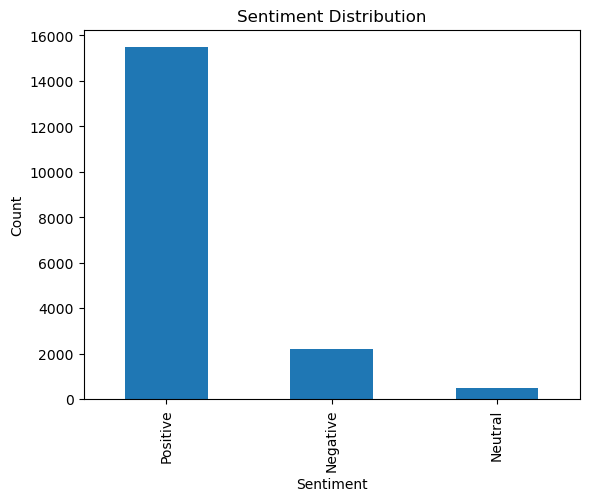

In [121]:
# Distribution of sentiment values
sentiment_distribution = review['sentiment'].value_counts()
print(sentiment_distribution)

# Plot sentiment distribution
sentiment_distribution.plot(kind='bar', title='Sentiment Distribution', xlabel='Sentiment', ylabel='Count')
plt.show()


sentiment
Negative    0.336957
Neutral     3.000000
Positive    4.893102
Name: stars, dtype: float64


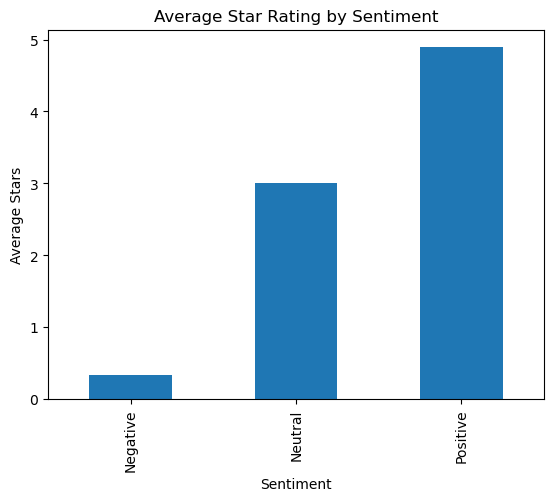

In [123]:
# Mean star rating for each sentiment
sentiment_star_mean = review.groupby('sentiment')['stars'].mean()
print(sentiment_star_mean)

# Visualize sentiment vs. star ratings
sentiment_star_mean.plot(kind='bar', title='Average Star Rating by Sentiment', xlabel='Sentiment', ylabel='Average Stars')
plt.show()


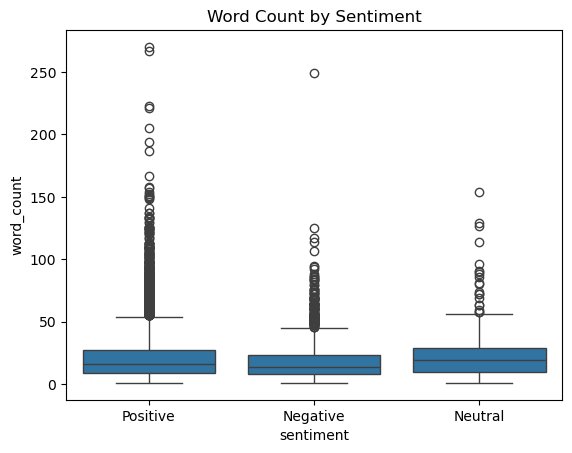

In [125]:
# Add a column for review word counts
review['word_count'] = review['text'].apply(lambda x: len(str(x).split()))

# Boxplot for word count by sentiment
sns.boxplot(x='sentiment', y='word_count', data=review)
plt.title('Word Count by Sentiment')
plt.show()


In [133]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(review['text'].map(' '.join))
X = pd.DataFrame(X.toarray())
X.head()


,0,1,2,3,4,5,6,7,8,9,...,8387,8388,8389,8390,8391,8392,8393,8394,8395,8396
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [153]:
X.describe()

,0,1,2,3,4,5,6,7,8,9,...,8387,8388,8389,8390,8391,8392,8393,8394,8395,8396
count,18087.000000,18087.000000,18087.000000,18087.000000,18087.000000,18087.000000,18087.000000,18087.000000,18087.000000,18087.000000,...,18087.000000,18087.000000,18087.000000,18087.000000,18087.000000,18087.000000,18087.000000,18087.000000,18087.000000,18087.000000
mean,0.000332,0.000055,0.000111,0.000111,0.000055,0.000111,0.000055,0.000111,0.000055,0.016421,...,0.000442,0.000111,0.000055,0.000166,0.000111,0.016255,0.000055,0.000111,0.000276,0.000221
std,0.021029,0.007436,0.010515,0.010515,0.007436,0.010515,0.007436,0.014871,0.007436,0.137537,...,0.021027,0.010515,0.007436,0.022307,0.014871,0.149314,0.007436,0.010515,0.016625,0.014870
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,...,1.000000,1.000000,1.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [155]:
from sklearn.model_selection import train_test_split

y = review['sentiment'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=99)


In [157]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train, y_train)


MultinomialNB()

In [159]:
y_pred = model.predict(X_test)

# Computing the accuracy and making the confusion matrix
from sklearn import metrics

# Accuracy
acc = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: %.2f\n' % (acc))

# Confusion Matrix
cm = metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm, '\n\n')

# Classification Report
print('-----------------------------------------------------------')
result = metrics.classification_report(y_test, y_pred)
print("Classification Report:\n")
print(result)


Accuracy: 0.86

Confusion Matrix:
[[ 115    2  315]
 [  10    1   86]
 [  97    0 2992]] 


-----------------------------------------------------------
Classification Report:

              precision    recall  f1-score   support

    Negative       0.52      0.27      0.35       432
     Neutral       0.33      0.01      0.02        97
    Positive       0.88      0.97      0.92      3089

    accuracy                           0.86      3618
   macro avg       0.58      0.42      0.43      3618
weighted avg       0.82      0.86      0.83      3618



In [165]:
reviews.head()

,Unnamed: 0,recipe_number,recipe_code,recipe_name,comment_id,user_id,user_name,user_reputation,created_at,reply_count,thumbs_up,thumbs_down,stars,best_score,text,compound,neg,neu,pos
0,0,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2G3aneMRgRMZwXqIHmSdXSG1hEM,u_9iFLIhMa8QaG,Jeri326,1,1665619889,0,0,0,5,527,"I tweaked it a little, removed onions because ...",0.8881,0.044,0.768,0.188
1,1,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2FsPC83HtzCsQAtOxlbL6RcaPbY,u_Lu6p25tmE77j,Mark467,50,1665277687,0,7,0,5,724,Bush used to have a white chili bean and it ma...,0.6360,0.000,0.856,0.144
2,2,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2FPrSGyTv7PQkZq37j92r9mYGkP,u_s0LwgpZ8Jsqq,Barbara566,10,1664404557,0,3,0,5,710,I have a very complicated white chicken chili ...,0.9437,0.063,0.668,0.268
3,3,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2DzdSIgV9qNiuBaLoZ7JQaartoC,u_fqrybAdYjgjG,jeansch123,1,1661787808,2,2,0,0,581,"In your introduction, you mentioned cream chee...",0.0000,0.000,1.000,0.000
4,4,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2DtZJuRQYeTFwXBoZRfRhBPEXjI,u_XXWKwVhKZD69,camper77,10,1664913823,1,7,0,0,820,Wonderful! I made this for a &#34;Chili/Stew&#...,0.6114,0.000,0.900,0.100


In [168]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
# Initialize the sentiment analyzer
sentiment = SentimentIntensityAnalyzer()

# Ensure that 'review' refers to the DataFrame and 'text' contains the review strings
reviews['compound'] = [sentiment.polarity_scores(text)['compound'] for text in reviews['text']]
reviews['neg'] = [sentiment.polarity_scores(text)['neg'] for text in reviews['text']]
reviews['neu'] = [sentiment.polarity_scores(text)['neu'] for text in reviews['text']]
reviews['pos'] = [sentiment.polarity_scores(text)['pos'] for text in reviews['text']]

In [170]:
reviews.head()

,Unnamed: 0,recipe_number,recipe_code,recipe_name,comment_id,user_id,user_name,user_reputation,created_at,reply_count,thumbs_up,thumbs_down,stars,best_score,text,compound,neg,neu,pos
0,0,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2G3aneMRgRMZwXqIHmSdXSG1hEM,u_9iFLIhMa8QaG,Jeri326,1,1665619889,0,0,0,5,527,"I tweaked it a little, removed onions because ...",0.8881,0.044,0.768,0.188
1,1,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2FsPC83HtzCsQAtOxlbL6RcaPbY,u_Lu6p25tmE77j,Mark467,50,1665277687,0,7,0,5,724,Bush used to have a white chili bean and it ma...,0.6360,0.000,0.856,0.144
2,2,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2FPrSGyTv7PQkZq37j92r9mYGkP,u_s0LwgpZ8Jsqq,Barbara566,10,1664404557,0,3,0,5,710,I have a very complicated white chicken chili ...,0.9437,0.063,0.668,0.268
3,3,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2DzdSIgV9qNiuBaLoZ7JQaartoC,u_fqrybAdYjgjG,jeansch123,1,1661787808,2,2,0,0,581,"In your introduction, you mentioned cream chee...",0.0000,0.000,1.000,0.000
4,4,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2DtZJuRQYeTFwXBoZRfRhBPEXjI,u_XXWKwVhKZD69,camper77,10,1664913823,1,7,0,0,820,Wonderful! I made this for a &#34;Chili/Stew&#...,0.6114,0.000,0.900,0.100


In [172]:
reviews[['compound','neg','neu','pos']].describe()

,compound,neg,neu,pos
count,18180.00000,18180.000000,18180.000000,18180.000000
mean,0.66610,0.019472,0.722782,0.257251
std,0.33992,0.046011,0.174324,0.178423
min,-0.96020,0.000000,0.000000,0.000000
25%,0.57770,0.000000,0.644000,0.141000
50%,0.79010,0.000000,0.751000,0.227000
75%,0.89720,0.019000,0.833000,0.337000
max,0.99600,1.000000,1.000000,1.000000


<Axes: xlabel='compound', ylabel='Count'>

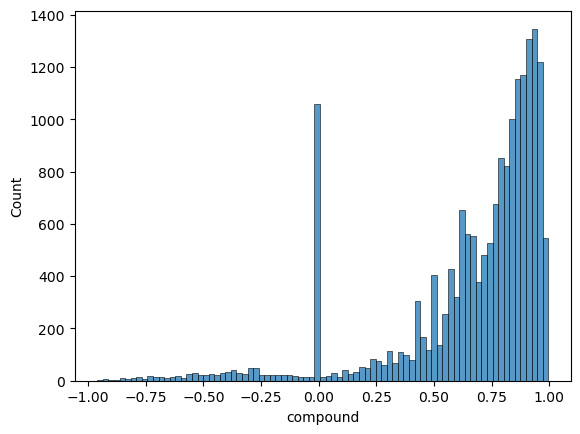

In [174]:
sns.histplot(reviews['compound'])

<Axes: xlabel='pos', ylabel='Count'>

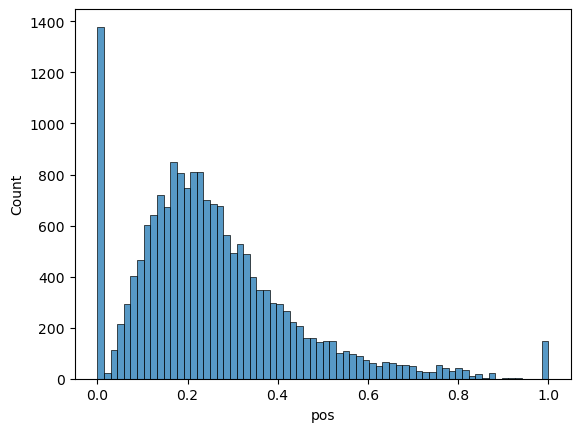

In [176]:
sns.histplot(reviews['pos'])

<Axes: xlabel='neg', ylabel='Count'>

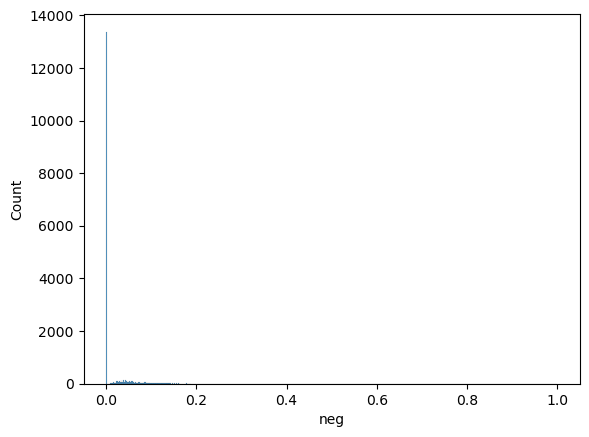

In [178]:
sns.histplot(reviews['neg'])

In [180]:
(reviews['compound']<=0).groupby(reviews['recipe_name']).sum()

recipe_name
Amish Breakfast Casserole    28
Apple Pie                    29
Asian Chicken Thighs          9
Bacon Macaroni Salad          8
Baked Mushroom Chicken        9
                             ..
Vegetarian Linguine           2
White Bean Chicken Chili     10
Winning Apple Crisp          15
Zucchini Cupcake             16
Zucchini Pizza Casserole     28
Name: compound, Length: 100, dtype: int64

In [182]:
percent_negative = pd.DataFrame((reviews['compound']<=0).groupby(reviews['recipe_name']).sum()
                               /reviews['recipe_name'].groupby(reviews['recipe_name']).count()*100,
                               columns=['%negative reviews']).sort_values(by='%negative reviews')
percent_negative

,%negative reviews
recipe_name,
Comforting Chicken Noodle Soup,3.809524
Shrimp Scampi,5.027933
Asian Chicken Thighs,5.769231
Favorite Chicken Potpie,5.837563
Chicken Wild Rice Soup,5.839416
...,...
Moist Chocolate Cake,17.672414
Chocolate Caramel Candy,17.757009
Porcupine Meatballs,18.382353


<Axes: xlabel='%negative reviews', ylabel='recipe_name'>

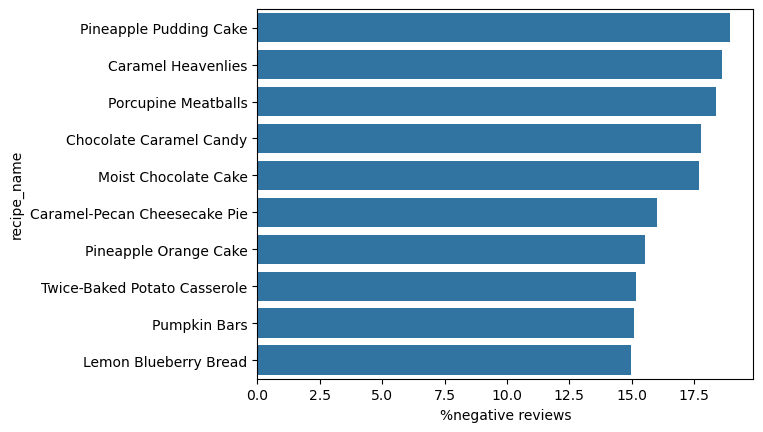

In [184]:
# Sort by '%negative reviews' in descending order and then take the top 10
top_10_percent_negative = percent_negative.sort_values(by='%negative reviews', ascending=False).head(10)

# Plot the sorted top 10 rows
sns.barplot(data=top_10_percent_negative, x='%negative reviews', y=top_10_percent_negative.index)


In [186]:
# Preprocess the reviews
reviews['processed_review'] = reviews['text'].apply(preprocess_text)

# Filter positive reviews for specific recipes
reviews_positive_subset = reviews.loc[
    (reviews['recipe_name'].isin(['Comforting Chicken Noodle Soup', 'Shrimp Scampi', 'Asian Chicken Thighs'])) & 
    (reviews['compound'] > 0),
    :
]

# Filter negative reviews for specific recipes
reviews_negative_subset = reviews.loc[
    (reviews['recipe_name'].isin(['Pineapple Pudding Cake', 'Caramel Heavenlines', 'Porcupine Meatballs'])) & 
    (reviews['compound'] <= 0),
    :
]


In [188]:
reviews_negative_subset.head()

,Unnamed: 0,recipe_number,recipe_code,recipe_name,comment_id,user_id,user_name,user_reputation,created_at,reply_count,thumbs_up,thumbs_down,stars,best_score,text,compound,neg,neu,pos,processed_review
14934,7,74,26937,Pineapple Pudding Cake,sp_aUSaElGf_26937_c_413515,u_1oKdmWUIlmDNExlmH8jF73Ru67Z,burbank.t,1,1622718388,0,2,1,0,193,The only 9 oz. cake mix I know out there is Ji...,0.0000,0.000,1.000,0.000,"[9, oz, cake, mix, know, jiffi, other, 15, oz]"
14936,9,74,26937,Pineapple Pudding Cake,sp_aUSaElGf_26937_c_399885,u_1oKdi02BdOazj4cvOgAlZo2KyVx,Dee J,1,1622718321,0,12,22,3,196,I will make it but I will make it healthier by...,-0.2083,0.112,0.785,0.103,"[make, make, healthier, use, poison, sweeten, ..."
14937,10,74,26937,Pineapple Pudding Cake,sp_aUSaElGf_26937_c_380767,u_1oKbmvbRIHZFC9iuO7vFAQIBRPY,MaxineSchoenholtz,1,1622718242,1,6,4,0,240,Aren’t most cake mixes more than 9 ounces? The...,0.0000,0.000,1.000,0.000,"[cake, mix, 9, ounc, name, brand, least, 15, o..."
14938,11,74,26937,Pineapple Pudding Cake,sp_aUSaElGf_26937_c_399074,u_1oKcAE9hDg4TAU4yq1hgjR93RFa,KerryOpel,1,1622718312,0,2,0,0,253,I used to make a full fat version of this cake...,-0.1154,0.092,0.832,0.076,"[use, make, full, fat, version, cake, coconut,..."
14956,29,74,26937,Pineapple Pudding Cake,sp_aUSaElGf_26937_c_200801,u_1oKWxTloS4FSiSj7Z8VEnKo5Wzk,sdgrandma,1,1622717333,0,1,0,5,193,I make this cake all the time but I use a pine...,0.0000,0.000,1.000,0.000,"[make, cake, time, use, pineappl, cake, mix, p..."


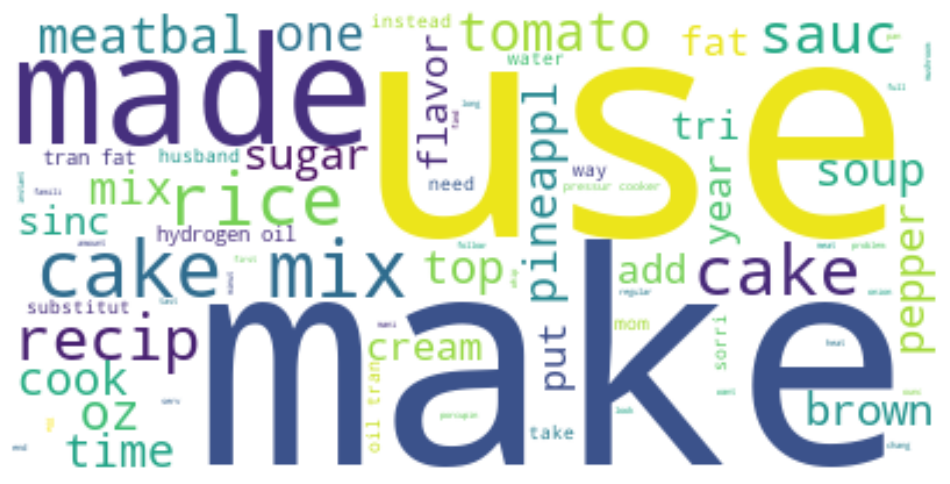

In [190]:
# Flatten the list of tokens for negative reviews
neg_tokens = [word for review in reviews_negative_subset['processed_review'] for word in review]

# Check if neg_tokens is non-empty
if neg_tokens:
    # Generate word cloud from the tokens
    wordcloud = WordCloud(background_color='white').generate(' '.join(neg_tokens))

    # Display the generated word cloud
    plt.figure(figsize=(12, 12))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()
else:
    print("No tokens found in the negative reviews to generate a word cloud.")


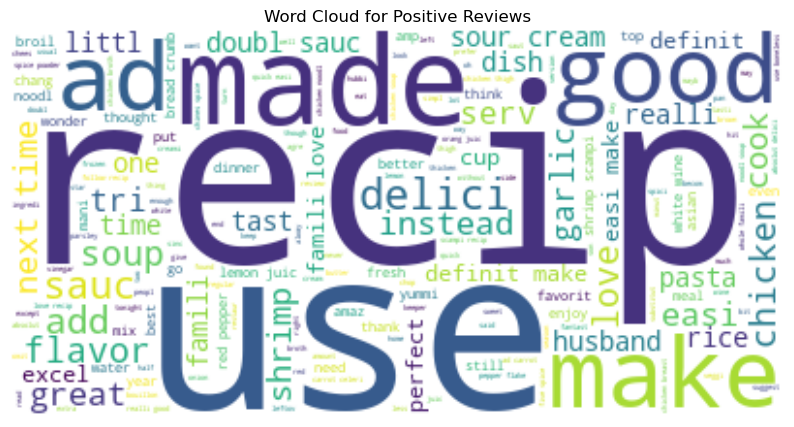

In [192]:
# Flatten the list of tokens for positive reviews
pos_tokens = [word for review in reviews_positive_subset['processed_review'] for word in review]

# Generate and display the word cloud if tokens are present
if len(pos_tokens) > 0:
    wordcloud = WordCloud(background_color='white').generate(' '.join(pos_tokens))
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title("Word Cloud for Positive Reviews")
    plt.show()
else:
    print("No tokens found in the positive reviews to generate a word cloud.")


In [194]:
from nltk.probability import FreqDist

# Calculate frequency distribution for positive tokens
pos_freqdist = FreqDist(pos_tokens)

# Tabulate the top 10 most common words
pos_freqdist.tabulate(10)


  recip      39    make     use chicken    sauc    made    good      ad    love 
    226     188     160     156     134     131     117     117     116     111 


In [196]:
# Calculate frequency distribution for negative tokens
neg_freqdist = FreqDist(neg_tokens)

# Tabulate the top 10 most common words
neg_freqdist.tabulate(10)


 cake   mix   use  make  made  rice recip    39  sauc   fat 
   32    25    25    23    19    15    14    13    12    10 


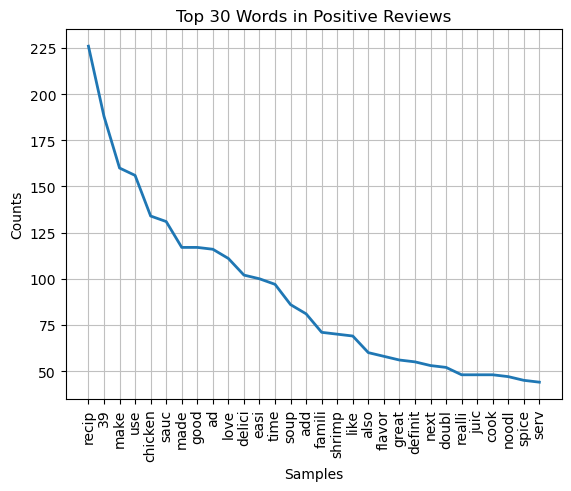

<Axes: title={'center': 'Top 30 Words in Positive Reviews'}, xlabel='Samples', ylabel='Counts'>

In [198]:
# Plot the top 30 most common words in positive reviews
pos_freqdist.plot(30, title="Top 30 Words in Positive Reviews")


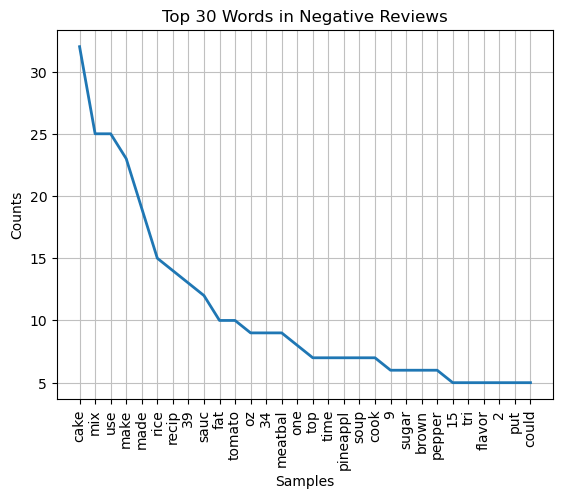

<Axes: title={'center': 'Top 30 Words in Negative Reviews'}, xlabel='Samples', ylabel='Counts'>

In [202]:
# Plot the top 30 most common words in negative reviews
neg_freqdist.plot(30, title="Top 30 Words in Negative Reviews")
